In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#just for the notebookbin
%run implementations
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' 
DATA_TEST_PATH = '../data/test.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
subsmission_y, submission_x, test_ids = load_csv_data(DATA_TEST_PATH)


In [3]:
tX[:,22]

array([2., 1., 1., ..., 1., 0., 0.])

In [4]:
#replace -999 with nan
tX = replace_999_with_nan(tX)
tX

array([[138.47 ,  51.655,  97.827, ...,   1.24 ,  -2.475, 113.497],
       [160.937,  68.768, 103.235, ...,     nan,     nan,  46.226],
       [    nan, 162.172, 125.953, ...,     nan,     nan,  44.251],
       ...,
       [105.457,  60.526,  75.839, ...,     nan,     nan,  41.992],
       [ 94.951,  19.362,  68.812, ...,     nan,     nan,   0.   ],
       [    nan,  72.756,  70.831, ...,     nan,     nan,   0.   ]])

In [21]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data = pd.DataFrame(tX)
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,211886.000000,250000.000000,250000.000000,250000.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,72543.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,150087.000000,150087.000000,150087.000000,72543.000000,72543.000000,72543.000000,250000.000000
mean,121.858528,49.239819,81.181982,57.895962,2.403735,371.783360,-0.821688,2.373100,18.917332,158.432217,1.437609,-0.128305,0.458290,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,73.064591
std,57.298157,35.344886,40.828691,63.655682,1.742226,397.699325,3.584362,0.782911,22.273494,115.706115,0.844743,1.193585,0.398681,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,60.662276,1.784546,1.813385,31.985782,2.031743,1.816950,98.015662
min,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,46.104000,0.047000,-1.414000,0.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000
25%,91.885250,19.241000,59.388750,14.068750,0.882500,111.977000,-2.629000,1.810000,2.841000,77.550000,0.883000,-1.371000,0.004000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,44.422500,-1.342000,-1.584000,37.312000,-1.612000,-1.576500,0.000000
50%,112.406000,46.524000,73.752000,38.467500,2.107000,225.885000,-0.244000,2.491500,12.315500,120.664500,1.280000,-0.356000,0.454000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,47.902000,-0.010000,-0.002000,40.512500
75%,135.482000,73.598000,92.259000,79.169000,3.690000,478.226000,0.958000,2.961000,27.591000,200.478250,1.777000,1.225000,0.879000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,103.342000,1.336000,1.562000,66.637000,1.589500,1.576000,109.933750
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [5]:
#Split data according to 0.8 ratio
x_train, y_train, x_test, y_test = split_data(tX, y, 0.8, seed=1)

In [6]:
# Append y values as column to later divide y into buckets corresponding with x values
x_train = np.column_stack((x_train, y_train))
x_test = np.column_stack((x_test, y_test))

In [7]:
(~np.isnan(x_train[:,0]))

array([ True,  True,  True, ...,  True, False,  True])

In [8]:
x_train[x_train[:, 0] != np.nan]

array([[100.368,  35.831,  77.185, ...,     nan,   0.   ,   1.   ],
       [ 76.662,  41.597,  57.61 , ...,     nan,   0.   ,  -1.   ],
       [131.952,  68.607,  97.411, ...,     nan,  50.139,  -1.   ],
       ...,
       [102.578,   0.685,  68.812, ...,  -1.76 , 270.367,   1.   ],
       [    nan,  92.544,  50.846, ...,     nan,   0.   ,  -1.   ],
       [ 30.988,  54.626,  25.405, ...,     nan,   0.   ,  -1.   ]])

In [9]:
# get all the needed buckets
buckets = get_buckets(x_train)
# y
y_buckets = []
for i in range(len(buckets)):
    y_buckets.append(buckets[i][:, -1])
    buckets[i] = np.delete(buckets[i], -1, 1)
# test
test_buckets = get_buckets(x_test)
submission_x_buckets = get_buckets(submission_x.copy())
# test y
test_y_buckets = []
for i in range(len(test_buckets)):
    test_y_buckets.append(test_buckets[i][:, -1])
    test_buckets[i] = np.delete(test_buckets[i], -1, 1)

In [10]:
x_train[:,0]

array([100.368,  76.662, 131.952, ..., 102.578,     nan,  30.988])

In [11]:
buckets[2]

array([[131.952,  68.607,  97.411, ...,     nan,     nan,  50.139],
       [221.773,  76.09 , 187.33 , ...,     nan,     nan,  88.544],
       [ 90.983,  59.974,  61.567, ...,     nan,     nan,  44.313],
       ...,
       [128.635,  39.178,  91.861, ...,     nan,     nan,  41.934],
       [120.41 ,  25.51 ,  76.66 , ...,     nan,     nan,  46.297],
       [156.969,  10.794,  93.543, ...,     nan,     nan,  34.938]])

In [28]:
import pandas as pd
bucket_1 = pd.DataFrame(buckets[1])
#b = bucket_1.copy()
#b.dropna(axis='columns',how='all')
bucket_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,NaN,87.016,99.312,2.530,NaN,NaN,NaN,1.894,2.530,141.290,0.287,-1.248,NaN,109.806,0.077,0.327,31.484,-0.574,2.106,109.315,-2.507,143.237,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,NaN,70.638,60.395,21.037,NaN,NaN,NaN,2.032,21.037,71.457,0.800,-1.400,NaN,39.691,0.884,-1.720,31.766,0.952,2.533,59.206,0.629,111.043,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,67.371,29.381,2.406,NaN,NaN,NaN,1.117,2.406,54.884,0.967,-1.414,NaN,27.909,-0.347,2.884,26.975,-0.660,1.812,45.062,-0.808,87.062,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,79.281,67.079,15.595,NaN,NaN,NaN,2.240,15.595,51.171,1.484,-0.873,NaN,20.596,0.225,0.484,30.575,-1.937,-0.101,51.465,2.967,153.171,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,64.876,83.098,22.956,NaN,NaN,NaN,2.298,22.956,58.582,0.968,-0.388,NaN,29.770,0.735,0.889,28.812,-1.561,0.804,36.622,-2.442,79.970,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20866,NaN,145.997,58.372,28.706,NaN,NaN,NaN,1.536,28.706,94.904,3.276,-0.905,NaN,22.193,0.787,2.646,72.711,1.486,-2.269,73.439,0.963,114.367,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
20867,NaN,103.969,157.686,12.742,NaN,NaN,NaN,3.228,12.742,71.847,1.241,-1.406,NaN,32.059,-0.858,1.847,39.788,2.148,3.023,72.661,-0.635,218.976,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
20868,NaN,79.405,109.343,1.038,NaN,NaN,NaN,2.619,1.038,76.913,0.884,-1.410,NaN,40.823,1.911,0.960,36.090,-0.158,2.565,53.501,-1.462,125.607,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
20869,NaN,79.557,22.700,0.384,NaN,NaN,NaN,0.856,0.384,52.701,1.415,-1.391,NaN,21.819,-0.263,1.658,30.882,0.514,1.300,51.512,-1.696,71.941,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [18]:
bucket_2 = pd.DataFrame(buckets[3])
bucket_3


NameError: name 'bucket_3' is not defined

In [ ]:
# Normalize the matrices
for i in range(len(buckets)):
    buckets[i] = normalize(buckets[i])
    test_buckets[i] = normalize(test_buckets[i])
    submission_x_buckets[i] = normalize(submission_x_buckets[i])

In [58]:
#Make sure there are no nans
np.isnan(tX).any()

False

In [59]:
# Append y values as column to later divide y into buckets corresponding with x values
train = np.column_stack((x_train, y_train))

In [60]:
# Split training x into buckets
buckets = get_buckets(train)

In [61]:
initial_weights = np.zeros(x_train.shape[1])

In [ ]:
# Least squares
#w , loss = least_squares(y_train,x_train)

# Least squares GD
#w , loss = least_squares_GD(y_train,x_train,initial_weights,200,0.01)

# Least squares SGD
#w, loss = least_squares_SGD(y_train,x_train,initial_weights,200,0.01)

# Ridge regression
w,loss = ridge_regression(y_train,x_train,0.0001)

# Logistic regression
#w,loss = logistic_regression(y_train,x_train,initial_weights,400,0.0001)

# reg logistic regression
#w,loss = reg_logistic_regression(y_train,x_train,0.001,initial_weights,100,0.0001)

In [ ]:
w

# Computing score on validation set

In [ ]:
weights = w
y_pred = predict_labels(weights,x_test)

In [ ]:
w

In [ ]:
# Compute accuracy 
true_positive = 0
false_positive = 0 
true_negative = 0
false_negative = 0

testing_length = y_test.shape[0]
for i in range(testing_length):      
    if (y_test[i] == y_pred[i]) and (y_pred[i]==1):        
        true_positive += 1
    if (y_test[i] == y_pred[i]) and (y_pred[i]==-1):
        true_negative +=1        
    if (y_test[i] != y_pred[i]) and (y_pred[i]==-1):    
        false_negative += 1
    if (y_test[i] != y_pred[i]) and (y_pred[i]==1):
        false_positive +=1
        
        
precision = true_positive/float(true_positive+false_positive)
recall =true_positive/float(true_positive + false_negative)
F=2 *(precision*recall)/float(precision+recall)        
    

print('Train accuracy: ',  ((true_positive+true_negative)/float(testing_length))*100.0)
print("precision : ", precision)
print("recall : ",recall)
print("F1 score : ",F)

        

In [63]:
from implementations import cross_validation
def cross_validation_demo():
    seed = 50
    degree = 0
    k_fold = 10
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # cross validation
    for lambda_ in lambdas:
        print("gamma",lambda_)
        rmse_tr_tmp = []
        rmse_te_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te,_ = cross_validation(y, tX, k_indices, k, lambda_, degree)
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
            
        print(np.mean(rmse_tr_tmp))
        rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))

    cross_validation_visualization(lambdas, rmse_tr, rmse_te)


gamma 0.0001
0.9951831806978536
gamma 0.00013738237958832623
0.99343932833901
gamma 0.00018873918221350977
0.9910917754235818
gamma 0.0002592943797404667
0.987954311660066
gamma 0.0003562247890262444
0.9838013807696389
gamma 0.0004893900918477494
0.9783737812872273
gamma 0.0006723357536499335
0.9713967806433921
gamma 0.0009236708571873865
0.9626166753833569
gamma 0.0012689610031679222
0.9518606930877305
gamma 0.0017433288221999873
0.9391217481316234
gamma 0.002395026619987486
0.9246647950030426
gamma 0.0032903445623126675
0.9091410027223941
gamma 0.004520353656360241
0.8936558486515697
gamma 0.006210169418915616
0.8796499568125737
gamma 0.008531678524172805
0.8684346244503356
gamma 0.011721022975334805
0.8605218608839056
gamma 0.01610262027560939
0.8553296044445948
gamma 0.02212216291070448
0.8516593964291527
gamma 0.03039195382313198
0.8484942464010494
gamma 0.041753189365604
0.8453687696109599
gamma 0.05736152510448681
0.8422308129001767
gamma 0.07880462815669913
0.839197789286693
ga

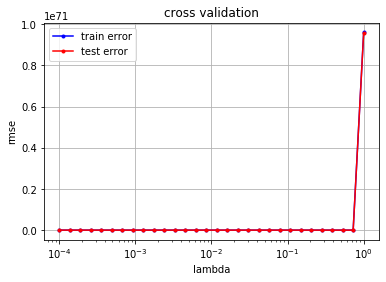

In [64]:
cross_validation_demo()

## Do your thing crazy machine learning thing here :) ...

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
weights = w
weights.shape

In [ ]:
OUTPUT_PATH = '../data/sub.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)